In [1]:
import numpy as np
from scipy import integrate, special, interpolate
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib widget

In [3]:
def calc_F(x):
    """
    Returns values of function F (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """

    def fy1(y):
        return special.kv(5.0 / 3.0, y)

    if isinstance(x, float):
        return x * integrate.quad(fy1, x, np.inf)[0]
    else:
        F_x = np.zeros(len(x))
        for i, x_i in enumerate(x):
            F_x[i] = x_i * integrate.quad(fy1, x_i, np.inf)[0]
        return F_x

def calc_F_2(x, calc_F, p):
    """
    Returns values of function F2 (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """

    def fy2(y):
        return calc_F(y) * (y ** ((p - 2.0) / 2.0))

    if isinstance(x, float):
        return np.sqrt(3) * integrate.quad(fy2, 0, x)[0]
    else:
        F_2_x = np.zeros(len(x))
        for i, x_i in enumerate(x):
            if x_i < 20000:
                F_2_x[i] = np.sqrt(3) * integrate.quad(fy2, 0, x_i)[0]
            else:
                F_2_x[i:] = np.sqrt(3) * integrate.quad(fy2, 0, 20000)[0]
        return F_2_x

In [10]:
p = 2.0
x = np.arange(0,100)
F2 = calc_F_2(x,calc_F,p)

p_new = 3.5
x = np.arange(0,100)
F2_new = calc_F_2(x,calc_F,p_new)


/tmp/ipykernel_17158/814167981.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return x * integrate.quad(fy1, x, np.inf)[0]


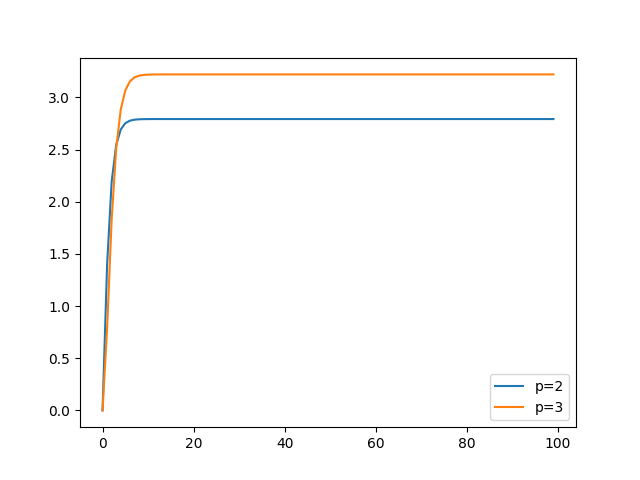

In [11]:
plt.figure()

plt.plot(x,F2, label="p=2")
plt.plot(x,F2_new, label="p=3")
plt.legend()


In [48]:
p_2pt5 = 2.5

x_new = 3.5

F2_2pt5 = calc_F_2(x_new,calc_F,p_2pt5)
F2_2pt5

2.5460275310462217

In [18]:
print(x)
print(p)
print(p_new)
p_array = np.array([p,p_new])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
2.0
3.5


In [19]:
xg, pg = np.meshgrid(x,p_array, sparse=True, indexing="ij")


In [30]:
def F_x(x,p):
    return x+p

In [31]:
F_trial = F_x(xg,pg)

In [33]:
np.shape(F_trial)

(100, 2)

In [44]:
data = np.vstack((F2,F2_new))
F2_new

array([-0.        ,  0.78602463,  1.8263449 ,  2.51241854,  2.88449665,
        3.06791744,  3.15331791,  3.19159054,  3.20827905,  3.21540726,
        3.21840322,  3.2196462 ,  3.22015643,  3.22036402,  3.22044784,
        3.22048147,  3.22049488,  3.22050021,  3.22050231,  3.22050314,
        3.22050347,  3.22050359,  3.22050364,  3.22050366,  3.22050367,
        3.22050367,  3.22050367,  3.22050367,  3.22050367,  3.22050367,
        3.22050367,  3.22050367,  3.22050367,  3.22050367,  3.22050368,
        3.22050367,  3.22050367,  3.22050367,  3.22050367,  3.22050367,
        3.22050367,  3.22050367,  3.22050367,  3.22050367,  3.22050367,
        3.22050367,  3.22050368,  3.22050367,  3.22050367,  3.22050367,
        3.22050367,  3.22050367,  3.22050367,  3.22050367,  3.22050367,
        3.22050367,  3.22050367,  3.22050367,  3.22050367,  3.22050367,
        3.22050367,  3.22050367,  3.22050367,  3.22050367,  3.22050367,
        3.22050367,  3.22050367,  3.22050367,  3.22050368,  3.22

In [50]:
interp_func = interpolate.RegularGridInterpolator((x,p_array),data.T)

In [ ]:
interp_func([3.5,2.5])